In [1]:
from scipy.stats import moment
from scipy.stats import kurtosis, skew, scoreatpercentile
from scipy.stats import norm, lognorm, beta
from scipy.optimize import minimize

from numpy import zeros, fromiter, savetxt
from IPython.display import Image

import subprocess

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import auxiliar_matcomp as aux

#%matplotlib inline

size = 2**12
t = fromiter((i for i in range(0,size)), int, size)

# <center>Mapeamento de Henon com $a=1.2$, $b=0.2$ e $X_0=Y_0=0.0001$</center>

* [Série Completa](#sc)
* [Primeiros 1024  pontos](#first)
* [Últimos 1024 pontos](#last)

<a id='sc'></a>
## <center>Série Completa</center>
* [Geração e plot](#genplot)
* [Cálculo dos momentos estatísticos](#calcstats)
* [Distribuição Normal fitada](#fitnormdist)
* [Distribuição Lognormal fitada](#fitlognormdist)
* [Plot do espaço de Cullen-Frey](#cullenfrey)
* [Fitting da melhor distribuição segundo método de Cullen-Frey](#fitbestdist)
* [Plot da função de autocorrelação](#autocorre)
* [Plot do PSD e DFS](#psddfa)

<a id='genplot'></a>
### <center>Gerando série temporal e plotando resultado</center>

In [2]:
name = "A.ex:1.2.b"

a = 1.2
b = 0.2

# A desempenha o [apel de X]
A = zeros(size)
Y = zeros(size)

A[0] = 0.0001
Y[0] = 0.0001

for i in range(0, size-1):
    A[i+1] = 1 - a*A[i]**2.0 + b*Y[i]
    Y[i+1] = b*A[i] 
    
savetxt(name + ".txt", A)

save_A = A

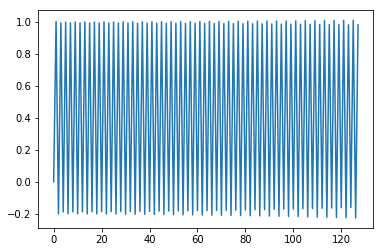

In [3]:
num_points = 128
plt.plot(t[0:num_points], A[0:num_points])
plt.show()

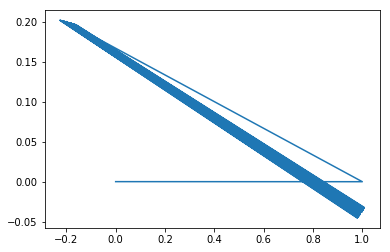

In [4]:
plt.plot(A[0:128], Y[0:128])
plt.show()

<a id='calcstats'></a>
### <center>Calculando os momentos do ensemble</center>

In [5]:
A_mean, A_var, A_skew, A_kurtosis = aux.calcMoments(A)

print("mean : ", A_mean)
print("var  : ", A_var)
print("skew : ", A_skew)
print("kurt : ", A_kurtosis)

A_Q1 = scoreatpercentile(A, 25)
A_Q3 = scoreatpercentile(A, 75)

print("Q1   : ", A_Q1)
print("Q3   : ", A_Q3)

mean :  0.401326242368
var  :  0.351227540087
skew :  -0.0130448511953
kurt :  -1.97452655084
Q1   :  -0.191633648323
Q3   :  0.993207510857


<a id='fitnormdis'></a>
### <center>Fitando uma distribuição normal</center>

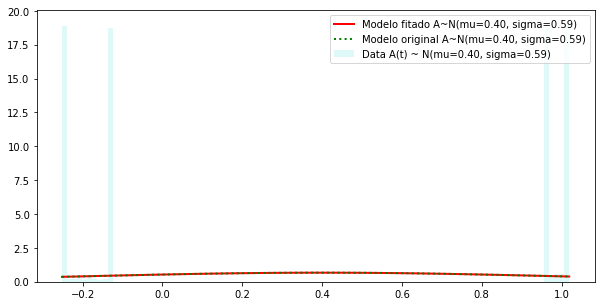

In [6]:
aux.fitting_normal_distribution(A)

<a id='fitlognormdist'></a>
### <center>Fitando uma distribuição lognormal</center>

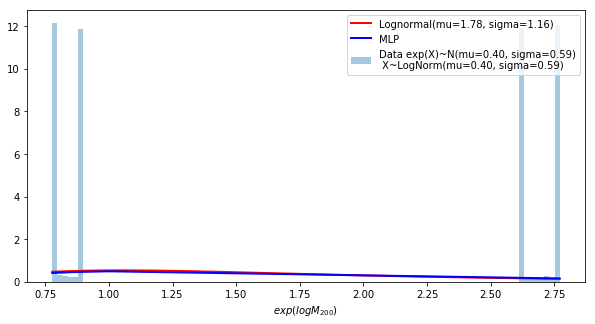

In [7]:
aux.fitting_lognormal_and_mlp_distribution(A)

### Fitando uma distribuição lognormal (utlizando minha implementação)

parametros de fitting:  (16.181406174481673, -0.25188173620479981, 0.56145950782959431)
        Fitado			 Original
mean :  4.042939645591187e+56 	 0.401326242368
var  :  8.475242844523751e+226 	 0.351227540087
skew :  3.7336744886360834e+170 	 -0.013044851195298805
kurt :  inf 	 -1.9745265508416838


/usr/lib64/python3.4/site-packages/numpy/lib/polynomial.py:680: RuntimeWarning: overflow encountered in multiply
  y = y * x + p[i]


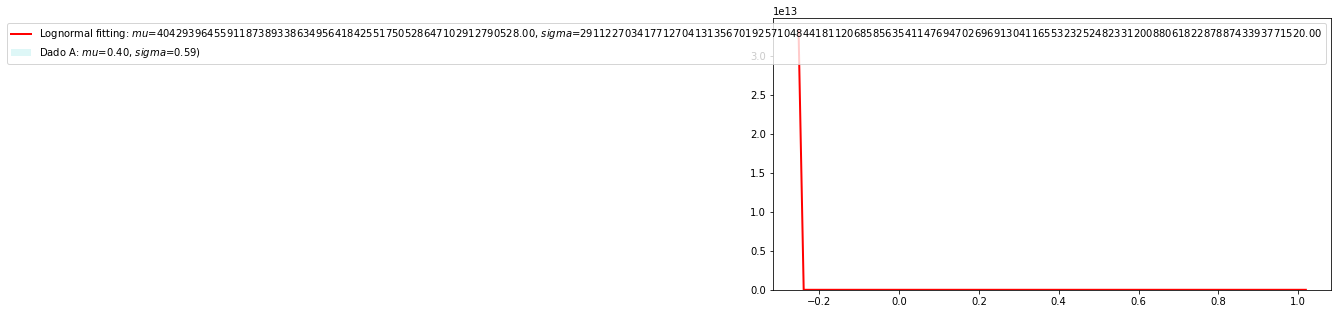

In [8]:
aux.fitting_lognormal_distribution(A)

<a id='cullenfrey'></a>
### <center>Plotando dados no espaço de Cullen-Frey</center>

summary statistics
------
min:  -0.2518817   max:  1.019319 
median:  0.4823697 
mean:  0.4013262 
estimated sd:  0.5927169 
estimated skewness:  -0.01304963 
estimated kurtosis:  1.024527 



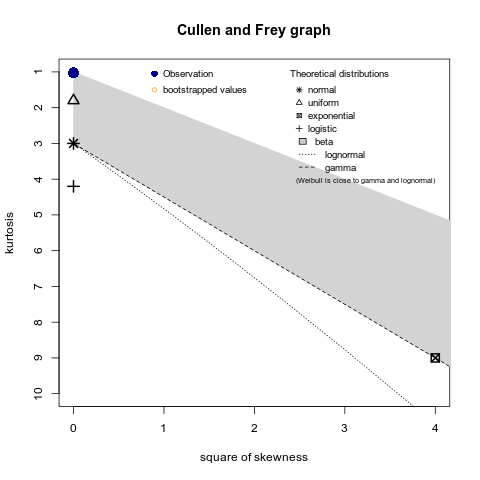

In [9]:
command = 'Rscript'
path_script = 'cullen_frey_script.R'

# define arguments
args = [name,]

# build subprocess command
cmd = [command, path_script] + args

x = subprocess.check_output(cmd, universal_newlines=True)
print(x)

Image(name+".png")

<a id='fitbestdis'></a>
### <center>Fitando melhor distribuição segundo método de Cullen-Frey</center>

parametros de fitting:  (0.18375603185627709, 0.1763677443863115, -0.25198173620479974, 1.2714006750847249)
        Fitado			 Original
mean :  0.39676060841502175 	 0.401326242368
var  :  0.29699122407725503 	 0.351227540087
skew :  -0.040559989569617295 	 -0.013044851195298805
kurt :  -1.7839152348474876 	 -1.9745265508416838


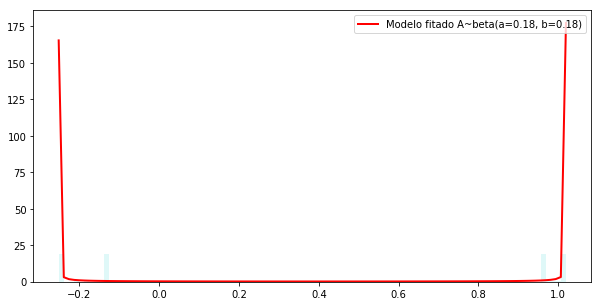

In [10]:
aux.fitting_beta_distribution(A)

<a id='autocorre'></a>
### <center>Calculando autocorrelação</center>

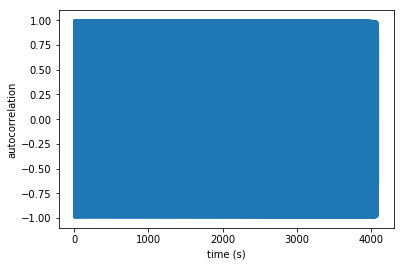

In [11]:
aux.plot_estimated_autocorrelation(t, A, 0, len(A))

<a id='psddfa'></a>
### <center>Plotando DFA e PSD</center>

Original time series data (4096 points): 

First 10 points: [  1.00000000e-04   1.00001999e+00  -2.00043972e-01   9.91979691e-01
  -1.88830207e-01   9.96890971e-01  -2.00103138e-01   9.91826120e-01
  -1.88466988e-01   9.97049278e-01]


1. Plotting time series data...
2. Plotting Power Spectrum Density...
3. Plotting Detrended Fluctuation Analysis...


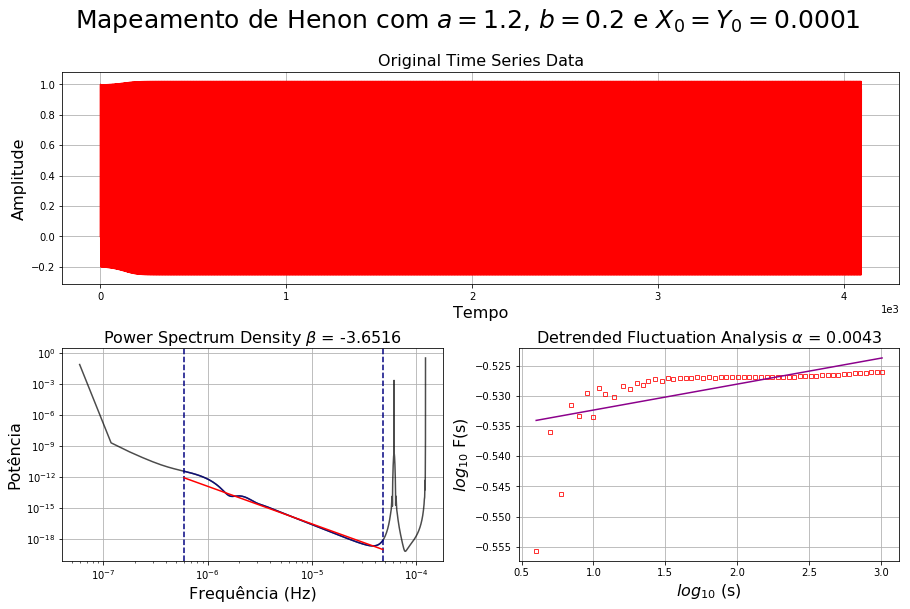

In [12]:
aux.plot_psd_dfa(A, 'Mapeamento de Henon com $a=1.2$, $b=0.2$ e $X_0=Y_0=0.0001$')

<a id='first'></a>
## <center>Analise dos primeiros 1024 pontos</center>
* [Cálculo dos momentos estatísticos](#calcstatsfirst)
* [Distribuição Normal fitada](#fitnormdistfirst)
* [Distribuição Lognormal fitada](#fitlognormdistfirst)
* [Plot do espaço de Cullen-Frey](#cullenfreyfirst)
* [Fitting da melhor distribuição segundo método de Cullen-Frey](#fitbestdistfirst)
* [Plot da função de autocorrelação](#autocorrefirst)
* [Plot do PSD e DFS](#psddfafirst)

In [13]:
A = save_A[1024:]
name = "A.ex:1.2.b"
savetxt(name + ".txt", A)

<a id='calcstatsfirst'></a>
### <center>Calculando os momentos do ensemble</center>

In [14]:
A_mean, A_var, A_skew, A_kurtosis = aux.calcMoments(A)

print("mean : ", A_mean)
print("var  : ", A_var)
print("skew : ", A_skew)
print("kurt : ", A_kurtosis)

A_Q1 = scoreatpercentile(A, 25)
A_Q3 = scoreatpercentile(A, 75)

print("Q1   : ", A_Q1)
print("Q3   : ", A_Q3)

mean :  0.401341559762
var  :  0.351185037931
skew :  -0.0134927201204
kurt :  -1.9735921299
Q1   :  -0.158003256807
Q3   :  0.978309334756


<a id='fitnormdistfist'></a>
### <center>Fitando uma distribuição normal</center>

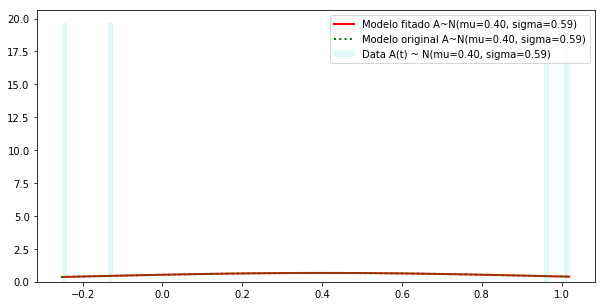

In [15]:
aux.fitting_normal_distribution(A)

<a id='fitlognormdistfirst'></a>
### <center>Fitando uma distribuição lognormal</center>

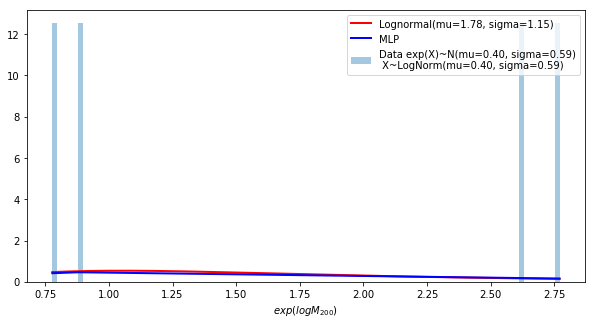

In [16]:
aux.fitting_lognormal_and_mlp_distribution(A)

### Fitando uma distribuição lognormal (utlizando minha implementação)

parametros de fitting:  (16.924465921001211, -0.25188173620479981, 0.019001438732603886)
        Fitado			 Original
mean :  3.0054496658461753e+60 	 0.401341559762
var  :  2.2597732556528257e+245 	 0.351185037931
skew :  3.957026145573068e+186 	 -0.013492720120356697
kurt :  inf 	 -1.9735921298968766


/usr/lib64/python3.4/site-packages/numpy/lib/polynomial.py:680: RuntimeWarning: overflow encountered in multiply
  y = y * x + p[i]


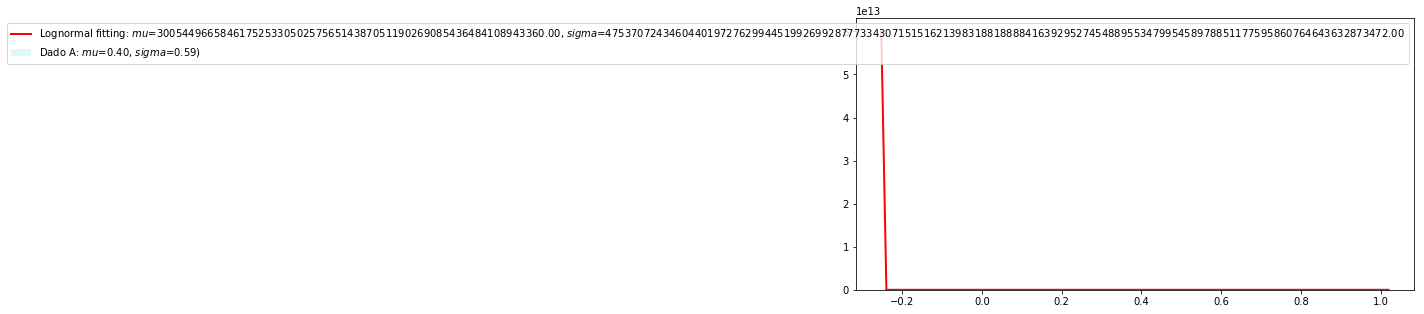

In [17]:
aux.fitting_lognormal_distribution(A)

<a id='cullenfreyfirst'></a>
### <center>Plotando dados no espaço de Cullen-Frey</center>

summary statistics
------
min:  -0.2518817   max:  1.019319 
median:  0.4189645 
mean:  0.4013416 
estimated sd:  0.5927051 
estimated skewness:  -0.01349931 
estimated kurtosis:  1.025148 



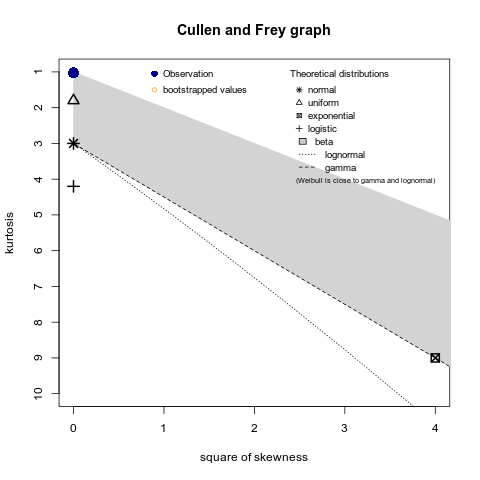

In [18]:
command = 'Rscript'
path_script = 'cullen_frey_script.R'

# define arguments
args = [name,]

# build subprocess command
cmd = [command, path_script] + args

x = subprocess.check_output(cmd, universal_newlines=True)
print(x)


Image(name+".png")

<a id='fitbestdistfirst'></a>
### <center>Fitando melhor distribuição segundo método de Cullen-Frey</center>

parametros de fitting:  (0.17843475888224822, 0.17189606553329972, -0.25198173620479974, 1.2714006750847249)
        Fitado			 Original
mean :  0.39558352808486513 	 0.401341559762
var  :  0.29916679332237217 	 0.351185037931
skew :  -0.03691810180237319 	 -0.013492720120356697
kurt :  -1.7894337163565226 	 -1.9735921298968766


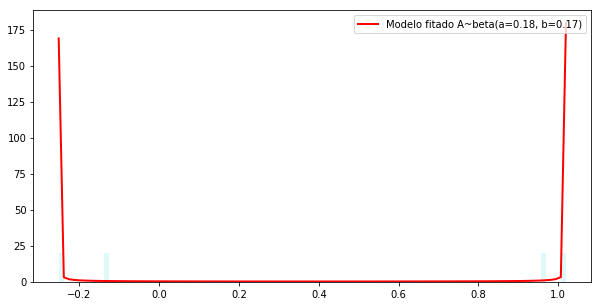

In [19]:
aux.fitting_beta_distribution(A)

<a id='autocorrefirst'></a>
### <center>Calculando autocorrelação</center>

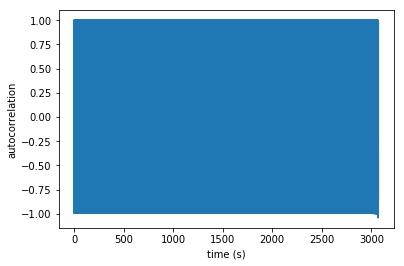

In [20]:
aux.plot_estimated_autocorrelation(t, A, 0, len(A))

<a id='psddfafirst'></a>
### <center>Plotando DFA e PSD</center>

Original time series data (3072 points): 

First 10 points: [-0.12671043  1.01931894 -0.25188174  0.96463947 -0.12671043  1.01931894
 -0.25188174  0.96463947 -0.12671043  1.01931894]


1. Plotting time series data...
2. Plotting Power Spectrum Density...
3. Plotting Detrended Fluctuation Analysis...


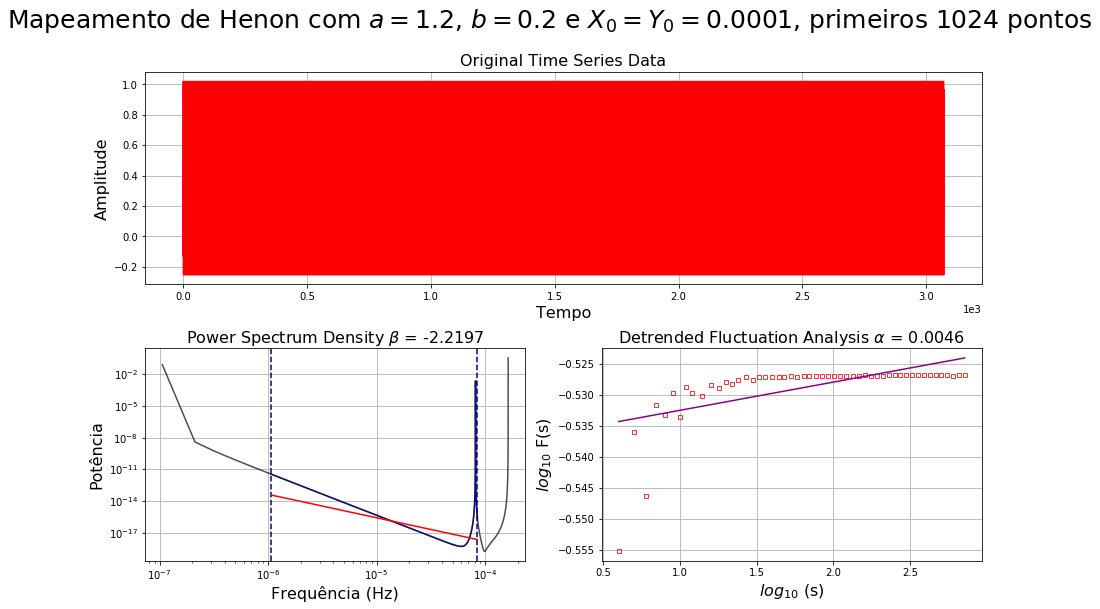

In [21]:
aux.plot_psd_dfa(A, 'Mapeamento de Henon com $a=1.2$, $b=0.2$ e $X_0=Y_0=0.0001$, primeiros 1024 pontos')

<a id='last'></a>
## <center>Analise dos últimos 1024 pontos</center>
* [Cálculo dos momentos estatísticos](#calcstatslast)
* [Distribuição Normal fitada](#fitnormdistlast)
* [Distribuição Lognormal fitada](#fitlognormdistlast)
* [Plot do espaço de Cullen-Frey](#cullenfreylast)
* [Fitting da melhor distribuição segundo método de Cullen-Frey](#fitbestdistlast)
* [Plot da função de autocorrelação](#autocorrelast)
* [Plot do PSD e DFS](#psddfalast)

In [22]:
A = save_A[3*1024:4096]
name = "A.ex:1.2.b"
savetxt(name + ".txt", A)

In [23]:
A.shape

(1024,)

<a id='calcstatslast'></a>
### <center>Calculando os momentos do ensemble</center>

In [24]:
A_mean, A_var, A_skew, A_kurtosis = aux.calcMoments(A)

print("mean : ", A_mean)
print("var  : ", A_var)
print("skew : ", A_skew)
print("kurt : ", A_kurtosis)

A_Q1 = scoreatpercentile(A, 25)
A_Q3 = scoreatpercentile(A, 75)

print("Q1   : ", A_Q1)
print("Q3   : ", A_Q3)

mean :  0.401341559762
var  :  0.351185037931
skew :  -0.0134927201204
kurt :  -1.9735921299
Q1   :  -0.158003256807
Q3   :  0.978309334756


<a id='fitnormdistlast'></a>
### <center>Fitando uma distribuição normal</center>

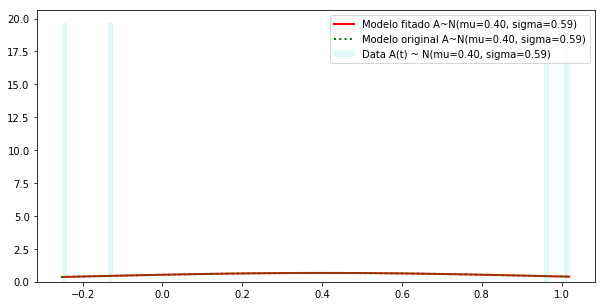

In [25]:
aux.fitting_normal_distribution(A)

<a id='fitlognormdistlast'></a>
### <center>Fitando uma distribuição lognormal</center>

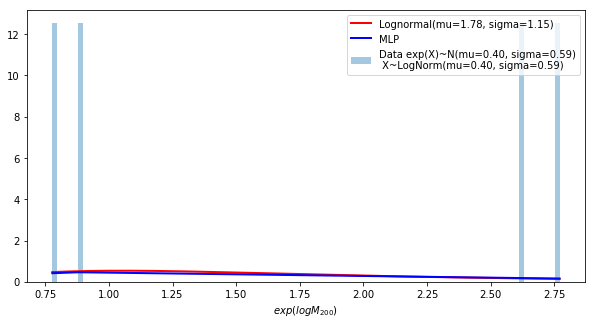

In [26]:
aux.fitting_lognormal_and_mlp_distribution(A)

### Fitando uma distribuição lognormal (utlizando minha implementação)

parametros de fitting:  (16.924465921001211, -0.25188173620479981, 0.019001438732603886)
        Fitado			 Original
mean :  3.0054496658461753e+60 	 0.401341559762
var  :  2.2597732556528257e+245 	 0.351185037931
skew :  3.957026145573068e+186 	 -0.013492720120357241


/usr/lib64/python3.4/site-packages/numpy/lib/polynomial.py:680: RuntimeWarning: overflow encountered in multiply
  y = y * x + p[i]


kurt :  inf 	 -1.973592129896877


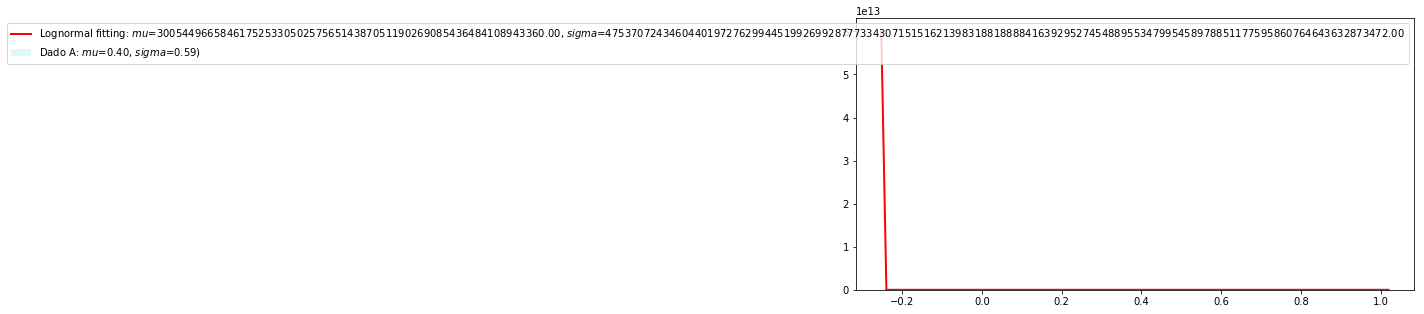

In [27]:
aux.fitting_lognormal_distribution(A)

<a id='cullenfreylast'></a>
### <center>Plotando dados no espaço de Cullen-Frey</center>

summary statistics
------
min:  -0.2518817   max:  1.019319 
median:  0.4189645 
mean:  0.4013416 
estimated sd:  0.5928982 
estimated skewness:  -0.01351252 
estimated kurtosis:  1.02262 



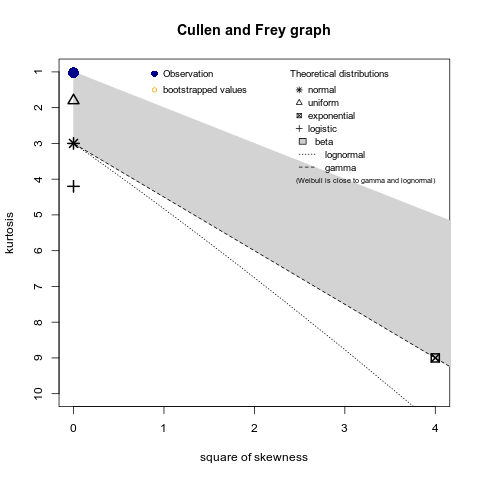

In [28]:
command = 'Rscript'
path_script = 'cullen_frey_script.R'

# define arguments
args = [name,]

# build subprocess command
cmd = [command, path_script] + args

x = subprocess.check_output(cmd, universal_newlines=True)
print(x)


Image(name+".png")

<a id='fitbestdistlast'></a>
### <center>Fitando melhor distribuição segundo método de Cullen-Frey</center>

parametros de fitting:  (0.17843475888224791, 0.17189606553330006, -0.25198173620479974, 1.2714006750847249)
        Fitado			 Original
mean :  0.395583528084864 	 0.401341559762
var  :  0.2991667933223723 	 0.351185037931
skew :  -0.03691810180236958 	 -0.013492720120357241
kurt :  -1.7894337163565224 	 -1.973592129896877


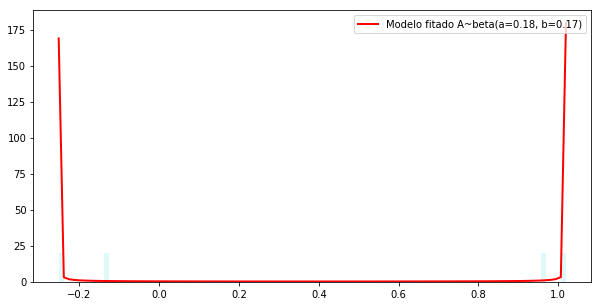

In [29]:
aux.fitting_beta_distribution(A)

<a id='autocorrelast'></a>
### <center>Calculando autocorrelação</center>

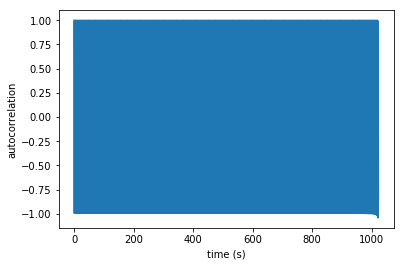

In [30]:
aux.plot_estimated_autocorrelation(t, A, 0, len(A))

<a id='psddfalast'></a>
### <center>Plotando DFA e PSD</center>

Original time series data (1024 points): 

First 10 points: [-0.12671043  1.01931894 -0.25188174  0.96463947 -0.12671043  1.01931894
 -0.25188174  0.96463947 -0.12671043  1.01931894]


1. Plotting time series data...
2. Plotting Power Spectrum Density...
3. Plotting Detrended Fluctuation Analysis...


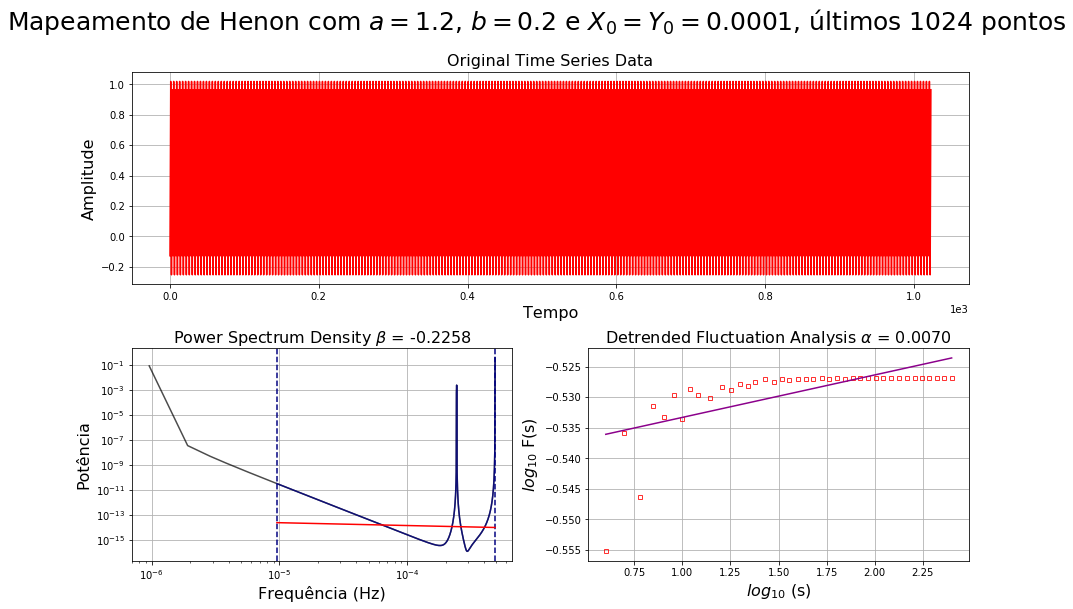

In [31]:
aux.plot_psd_dfa(A, 'Mapeamento de Henon com $a=1.2$, $b=0.2$ e $X_0=Y_0=0.0001$, últimos 1024 pontos')